<a href="https://colab.research.google.com/github/andrewthan/Missing-Mass/blob/main/MissingMassTaleofTwoCities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook implements simulations of missing mass and the WingIt estimator for text from the novel *A Tale of Two Cities* by Charles Dickens.

The details are in the following paper:

[PMT24] A. Pananjady, V. Muthukumar, A. Thangaraj, "Just Wing It: Optimal Estimation of Missing Mass in a Markovian Sequence"

In [2]:
import nltk
import matplotlib.pyplot as plt
import numpy as np

In [19]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.tokenize import word_tokenize, MWETokenizer

In [6]:
#Novel downloaded from Project Gutenberg (https://www.gutenberg.org/ebooks/98) and modified
#The file is modified to remove all auxiliary content and retain only the text of the novel
#wget needs to be run only once
#!wget -O TaleofTwoCities.txt https://www.dropbox.com/scl/fi/h5faiawwqdriznc9t5lw5/TaleofTwoCities.txt?rlkey=svlwrzxaaogy5d8m3lgf4f4kd&st=tnqzp8lz&dl=0

filename = "TaleofTwoCities.txt"
f = open(filename, mode = 'r', encoding = 'utf-8-sig')
raw = f.read()
raw[:50]

'\n\n\n\n\nIt was the best of times, it was the worst of'

In [9]:
#Preprocessing: tokenize
tokens = word_tokenize(raw)
print(len(tokens))
tokens[:5]

166303


['It', 'was', 'the', 'best', 'of']

In [12]:
#Stopwords and punctuations
swords = set(stopwords.words('english'))
print(swords)
punctuations = ['.',',','“','!','?',';',':','\'','(',')','”','’','*','--','‘']

{'any', 'they', 'how', "mustn't", 'from', 'he', "hasn't", 'shouldn', 'between', "hadn't", 'before', 'of', 'won', 'my', 'down', 'is', 'y', 'these', 'in', 'are', "mightn't", 'd', 'very', 'o', 'didn', 'all', 't', 'so', 've', 'most', "isn't", 'further', 'been', 'but', 'some', "aren't", 'll', 'she', 'those', 'after', 'off', "should've", 'ma', 'both', 'more', 'wouldn', 'nor', 'each', 'to', 'does', 'yourself', 'was', 'against', 'through', 'himself', 'haven', 'at', 'who', "haven't", 'ourselves', 'because', 'such', 'than', 'ours', 'm', "you'd", "won't", 'do', 'other', "couldn't", 'itself', 'isn', 'once', 'mustn', 'myself', 'which', 'hadn', 'on', 'what', 'will', 'ain', 'it', 'the', 'while', 'this', 'hasn', 'did', 'now', "it's", 'as', 'whom', 'into', "you've", 'its', 'themselves', 'having', 'don', 'doing', 'same', 'no', 'has', 's', 'about', 'if', 'am', 'that', 'their', "shouldn't", "you'll", 'our', 'yourselves', 'here', 'until', 'theirs', 'with', 'when', "needn't", "that'll", "shan't", 'then', 'a

In [13]:
#Preprocessing
#Convert to lower case
tokens = [t.lower() for t in tokens]
#Identify tokens that are not punctuations and not short words
tokens_c = [t for t in tokens if (t not in punctuations and t not in swords)]
#Identify tokens that are not punctuations
tokens_p = [t for t in tokens if (t not in punctuations)]
print([len(tokens_c),len(tokens_p)])

[63629, 137087]


In [14]:
# Finding most common bigrams (after removing short words and punctuations)
bigram_finder = BigramCollocationFinder.from_words(tokens_c)
bigram_finder.apply_freq_filter(min_freq=40)
bigrams = list(bigram_finder.ngram_fd.items())
# Finding most common trigrams
trigram_finder = TrigramCollocationFinder.from_words(tokens_c)
trigram_finder.apply_freq_filter(min_freq=10)
trigrams = list(trigram_finder.ngram_fd.items())
print(bigrams)
print(trigrams)

[(('said', 'mr.'), 111), (('mr.', 'lorry'), 335), (('miss', 'manette'), 49), (('saint', 'antoine'), 48), (('madame', 'defarge'), 121), (('mr.', 'cruncher'), 99), (('charles', 'darnay'), 53), (('doctor', 'manette'), 79), (('mr.', 'stryver'), 55), (('miss', 'pross'), 156), (('said', 'miss'), 44), (('mender', 'roads'), 45)]
[(('one', 'thousand', 'seven'), 11), (('thousand', 'seven', 'hundred'), 11), (('said', 'mr.', 'lorry'), 72), (('mr.', 'jarvis', 'lorry'), 10), (('said', 'mr.', 'cruncher'), 24), (('said', 'mr.', 'stryver'), 11), (('said', 'miss', 'pross'), 44), (('said', 'madame', 'defarge'), 20)]


In [15]:
#Selecting titles+names of characters of the novel for merging
bigrams_to_be_merged = [b[0] for b in bigrams if ('said' not in b[0] and 'mender' not in b[0])]
print(bigrams_to_be_merged)

[('mr.', 'lorry'), ('miss', 'manette'), ('saint', 'antoine'), ('madame', 'defarge'), ('mr.', 'cruncher'), ('charles', 'darnay'), ('doctor', 'manette'), ('mr.', 'stryver'), ('miss', 'pross')]


In [16]:
#Merge the titles+names into a single token
#The short words are retained
mwe_tokenizer = MWETokenizer(bigrams_to_be_merged, separator='_')
tokens_m = mwe_tokenizer.tokenize(tokens_p)
print(len(tokens_m))
print(tokens_m)

136092
['it', 'was', 'the', 'best', 'of', 'times', 'it', 'was', 'the', 'worst', 'of', 'times', 'it', 'was', 'the', 'age', 'of', 'wisdom', 'it', 'was', 'the', 'age', 'of', 'foolishness', 'it', 'was', 'the', 'epoch', 'of', 'belief', 'it', 'was', 'the', 'epoch', 'of', 'incredulity', 'it', 'was', 'the', 'season', 'of', 'light', 'it', 'was', 'the', 'season', 'of', 'darkness', 'it', 'was', 'the', 'spring', 'of', 'hope', 'it', 'was', 'the', 'winter', 'of', 'despair', 'we', 'had', 'everything', 'before', 'us', 'we', 'had', 'nothing', 'before', 'us', 'we', 'were', 'all', 'going', 'direct', 'to', 'heaven', 'we', 'were', 'all', 'going', 'direct', 'the', 'other', 'way', 'in', 'short', 'the', 'period', 'was', 'so', 'far', 'like', 'the', 'present', 'period', 'that', 'some', 'of', 'its', 'noisiest', 'authorities', 'insisted', 'on', 'its', 'being', 'received', 'for', 'good', 'or', 'for', 'evil', 'in', 'the', 'superlative', 'degree', 'of', 'comparison', 'only', 'there', 'were', 'a', 'king', 'with', 'a'

In [17]:
#Find frequency distribution of the final processed list of tokens
#This is the stationary distribution in the definition of missing mass
fdist = nltk.FreqDist(tokens_m)
print(len(fdist)) #Vocabulary size
print(fdist.most_common(50))

10542
[('the', 7991), ('and', 4980), ('of', 3998), ('to', 3473), ('a', 2930), ('in', 2583), ('it', 2027), ('his', 2007), ('i', 1959), ('that', 1925), ('he', 1855), ('was', 1767), ('you', 1381), ('with', 1311), ('had', 1305), ('as', 1163), ('her', 1036), ('at', 1029), ('him', 964), ('for', 957), ('on', 916), ('not', 892), ('is', 808), ('be', 757), ('have', 741), ('were', 661), ('said', 660), ('but', 659), ('s', 657), ('my', 655), ('so', 575), ('there', 575), ('they', 564), ('by', 563), ('this', 552), ('all', 549), ('no', 528), ('from', 514), ('me', 502), ('if', 461), ('she', 460), ('out', 443), ('been', 439), ('when', 439), ('one', 433), ('which', 421), ('them', 393), ('what', 383), ('who', 380), ('or', 364)]


In [18]:
#Compute missing mass (X: list of samples; stat_dist: stationary distribution)
#[PMT24]: Section 1
def MissingMass(X, stat_dist):
    Xseen = list(set(X))
    M = 1 - sum([stat_dist[x] for x in Xseen])
    return M

#WingIt estimator of missing mass (X: list of samples, n: length of X, tmix: window size)
#Linear-time implementation
#[PMT24]: Section 3.2, 3.3
def wingit(X, n, tmix, tskip = 1):
    Xloc = {}
    for i in range(n):
        if (X[i] not in Xloc):
            Xloc[X[i]] = []
        Xloc[X[i]].append(i)
    Mhat = 0
    for i in range(0,n,tskip):
        Mhat = Mhat + int((Xloc[X[i]][0]>(i-tmix)) and (Xloc[X[i]][-1]<(i+tmix)))/n
    return min(Mhat,1)

#Validation based tuning for window size
#[PMT24]: Section 6.1, except that c in the code is C_tune * 3
def estimatetmix(X,n,c):
    nby3 = int(n/3)
    X1 = X[:nby3]
    X3 = X[n-nby3:]
    Mprime = 0
    for x in X3:
        Mprime = Mprime + int(x not in X1)/nby3

    tmix1 = 1
    Mhat = wingit(X1, nby3, tmix1)
    while ((Mhat - Mprime)*(Mhat - Mprime))>=(c*tmix1/n):
        tmix1 = tmix1 * 2
        Mhat = wingit(X1, nby3, tmix1)
    return tmix1

In [20]:
#Simulate selection of sample, computing missing mass and estimating missing mass with WingIt
#nset: list of sample lengths n for simulation
#tset: list of window sizes of WingIt estimator for simulation ('est': will tune window size)
#Nrounds: number of trajectories to be simulated

N = len(tokens_m)
stat_dist = {w: fdist[w]/N for w in fdist} #stationary distribution

#The following are settings of n, window size used for the plotted results in the paper [PMT24]
#This runs in about 2 mins 30 secs
nset = [600,1200,2400,4800,9600,19200]
tset = [1,2,4,8,16,32,64,'est']
res = {(n,tmix):[] for n in nset for tmix in tset}
for n in nset:
    start_initial = int((N - int(N/n) * n)/2)
    for start_pos in range(start_initial,N-n,int(n/15)):
        X = tokens_m[start_pos:start_pos+n]
        M = MissingMass(X, stat_dist)
        for tmix in tset:
            if tmix == 'est':
                tmixest = estimatetmix(X,n,1)
            else:
                tmixest = tmix
            Mhat = wingit(X,n,tmixest)
            res[(n,tmix)].append((M,Mhat,tmixest))

In [21]:
#Compute MSE, Means, 5th to 95th percentile confidence bars
MSE = {}
M = {}
Mhat = {}
for n in nset:
    for tmix in tset:
        Mres = [pt[0] for pt in res[(n,tmix)]]
        Mhatres = [pt[1] for pt in res[(n,tmix)]]
        SE = [(pt[0]-pt[1])*(pt[0]-pt[1]) for pt in res[(n,tmix)]]
        MSE[(n,tmix)] = (np.mean(SE), np.percentile(SE,95))
        M[(n,tmix)] = (np.mean(Mres), np.percentile(Mres,95), np.percentile(Mres,5))
        Mhat[(n,tmix)] = (np.mean(Mhatres), np.percentile(Mhatres,95), np.percentile(Mhatres,5))

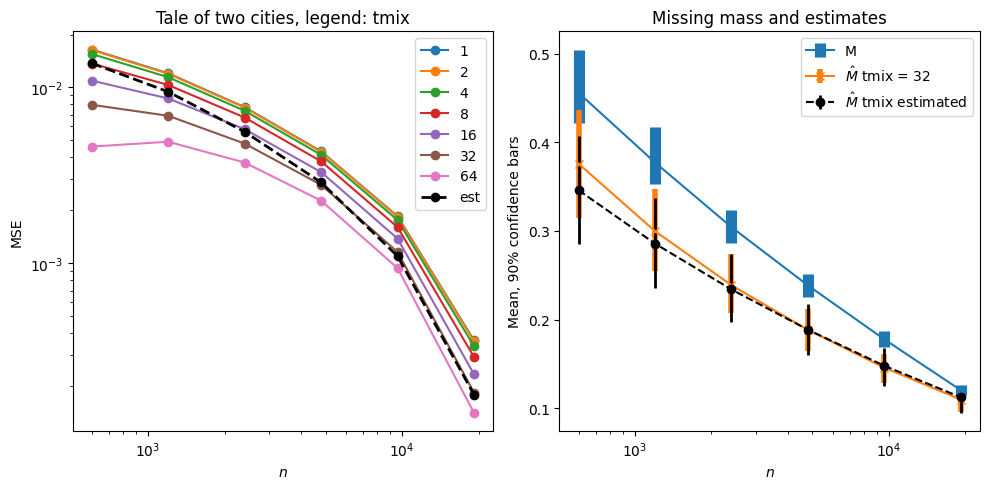

In [22]:
#Plot results
#[PMT24]: Figure 4
f, (ax0,ax1) = plt.subplots(ncols = 2, tight_layout=True, figsize=(10,5))
for tmix in tset:
    if tmix == 'est':
        ax0.plot(nset, [MSE[(n,'est')][0] for n in nset], 'ko--', linewidth=2)
    else:
        ax0.plot(nset, [MSE[(n,tmix)][0] for n in nset], 'o-')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend([str(tmix) for tmix in tset])
ax0.set_title('Tale of two cities, legend: tmix')
ax0.set_xlabel('$n$')
ax0.set_ylabel('MSE')

tbest = 32
lower = [M[(n,tbest)][0]-M[(n,tbest)][2] for n in nset]
upper = [M[(n,tbest)][1]-M[(n,tbest)][0] for n in nset]
ax1.errorbar(nset, [M[(n,tbest)][0] for n in nset], yerr = [lower,upper],fmt='o-',elinewidth=8)
lower = [Mhat[(n,tbest)][0]-Mhat[(n,tbest)][2] for n in nset]
upper = [Mhat[(n,tbest)][1]-Mhat[(n,tbest)][0] for n in nset]
ax1.errorbar(nset, [Mhat[(n,tbest)][0] for n in nset], yerr = [lower,upper],fmt='x-',elinewidth=4)
lower = [Mhat[(n,'est')][0]-Mhat[(n,'est')][2] for n in nset]
upper = [Mhat[(n,'est')][1]-Mhat[(n,'est')][0] for n in nset]
ax1.errorbar(nset, [Mhat[(n,'est')][0] for n in nset], yerr = [lower,upper],fmt='ko--',elinewidth=2)
ax1.set_xscale('log')
ax1.set_xlabel('$n$')
ax1.set_ylabel('Mean, 90% confidence bars')
ax1.set_title('Missing mass and estimates')
ax1.legend(['M','$\hat{M}$ tmix = '+str(tbest),'$\hat{M}$ tmix estimated'])

plt.show()